### 多项式回归概念
在线性回归中，我们是寻找一条直线来尽可能的拟合数据。但是我们在大部分情况下并不满足简单的线性回归的。如下图所示的这种特殊的线性回归的情况，这种特殊的回归方法被称为多项式回归（Polynomial regression）。
  
![](https://static.javatpoint.com/tutorial/machine-learning/images/machine-learning-polynomial-regression.png)

In [4]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (8,6)

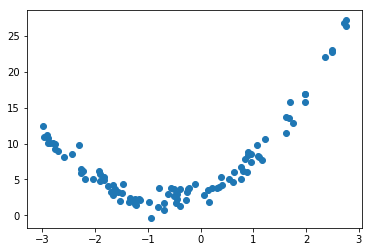

In [5]:
x = np.random.uniform(-3, 3, size = 100)
y = 2 * x ** 2 + 3 * x + 3 + np.random.normal(0, 1, size = 100) # 加上一点噪声

plt.scatter(x, y)
plt.show()

In [6]:
# 如果用线性回归：
from sklearn.linear_model import LinearRegression

X = x.reshape(-1,1)
lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression()

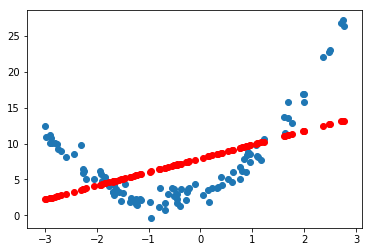

In [7]:
y_pred = lin_reg.predict(X)
plt.scatter(x, y)
plt.scatter(x, y_pred, color = 'r')
plt.show()

# 可见用线性回归去拟合明显不好

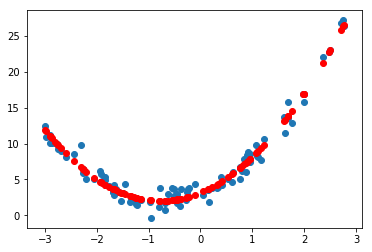

In [8]:
# 为了解决这个问题，可以增加一个特征
# 对X取平方

X2 = np.hstack([X, X**2])
lin_reg2 = LinearRegression()
lin_reg2.fit(X2, y)
y_pred2 = lin_reg2.predict(X2)
plt.scatter(x, y)
plt.scatter(x, y_pred2, color = 'r')
plt.show()

# 可以看到增加该平方特征后效果好了许多

In [9]:
# 线性回归中的系数：
print(lin_reg2.coef_)

# 能看出这两个系数与创造的y的系数几乎一致（因为添加了噪音）

[3.00707591 1.96951871]


In [10]:
# 截距
print(lin_reg2.intercept_)

3.1601859993259978


其实相当于对原数据做了一个升维操作。

### sklearn中的多项式回归
#### PolynomialFeatures生成多项式特征

In [11]:
x = np.random.uniform(-3, 3, size = 100)
y = 2 * x ** 2 + 3 * x + 3 + np.random.normal(0, 1, size = 100) # 加上一点噪声
X = x.reshape(-1, 1)

In [12]:
from sklearn.preprocessing import PolynomialFeatures

In [13]:
poly = PolynomialFeatures(degree=2) # 添加几次方特征
poly.fit(X)
X2 = poly.transform(X)

In [14]:
# 变为了三维数据
print(X2.shape)
print(X2[:5,:])

# 第一列可以理解为0次方，第二列为原数据，第三列为二次方

(100, 3)
[[1.         2.9840297  8.90443323]
 [1.         0.79898443 0.63837612]
 [1.         2.16198256 4.67416859]
 [1.         0.39699411 0.15760433]
 [1.         1.76995329 3.13273465]]


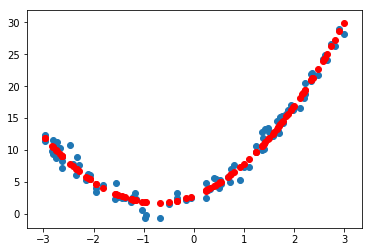

In [15]:
# 训练
lin_reg = LinearRegression()
lin_reg.fit(X2, y)
y_pred = lin_reg.predict(X2)
plt.scatter(x, y)
plt.scatter(x, y_pred, color = 'r')
plt.show()

In [16]:
lin_reg.coef_
# 比自己实现的结果多一列0

array([0.        , 2.99306744, 2.04005166])

In [17]:
lin_reg.intercept_

2.805818949122556

In [18]:
# 对于PolynomialFeatures中生成的新features理解
X = np.arange(1, 11).reshape(-1, 2)
X

array([[ 1,  2],
       [ 3,  4],
       [ 5,  6],
       [ 7,  8],
       [ 9, 10]])

In [19]:
poly = PolynomialFeatures(degree=2)
poly.fit(X)
X2 = poly.transform(X)
X2

# 第一列仍然是0次方，第二与第三列是原数据；第四列与第六列分别是原数据的平方，第五列则是原数据第一二列的乘积(x1 * x2)

array([[  1.,   1.,   2.,   1.,   2.,   4.],
       [  1.,   3.,   4.,   9.,  12.,  16.],
       [  1.,   5.,   6.,  25.,  30.,  36.],
       [  1.,   7.,   8.,  49.,  56.,  64.],
       [  1.,   9.,  10.,  81.,  90., 100.]])

#### Pipeline

In [20]:
x = np.random.uniform(-3, 3, size = 100)
y = 2 * x ** 2 + 3 * x + 3 + np.random.normal(0, 1, size = 100) # 加上一点噪声
X = x.reshape(-1, 1)

In [21]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [22]:
poly_reg = Pipeline([
    ("poly", PolynomialFeatures(degree=2)),
    ("std_scaler", StandardScaler()),
    ("lin_reg", LinearRegression())
])

In [23]:
poly_reg.fit(X,y)
y_pred = poly_reg.predict(X)

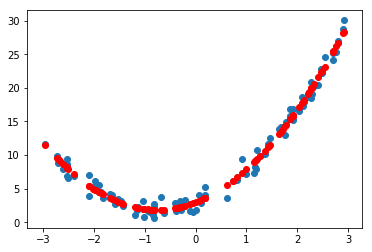

In [24]:
plt.scatter(x, y)
plt.scatter(x, y_pred, color = 'r')
plt.show()

### 过拟合(overfitting)与欠拟合(underfitting)
在实际情况中，多项式回归可能会造成过拟合现象。
![](https://i.pinimg.com/564x/f9/02/ee/f902ee564cb639f35cd49b1d530b3a15.jpg)

In [25]:
x = np.random.uniform(-3, 3, size = 100)
y =  0.5 * x ** 2 + x + 2 + np.random.normal(0, 1, size = 100) # 加上一点噪声
X = x.reshape(-1, 1)

#### 欠拟合

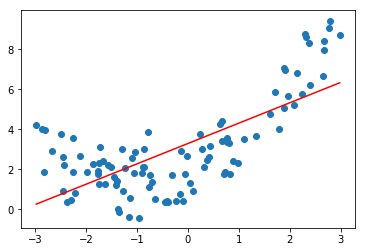

In [26]:
lin_reg = LinearRegression()
lin_reg.fit(X, y)
y_pred = lin_reg.predict(X)
plt.scatter(x, y)
# plt.scatter(x, y_pred, color = 'r')
plt.plot(np.sort(x), y_pred[np.argsort(x)], color = 'r')
plt.show()

In [27]:
# 均方误差
from sklearn.metrics import mean_squared_error
y_pred = lin_reg.predict(X)
mean_squared_error(y,y_pred)

2.748026950937296

#### 正常拟合

In [28]:
def PolynomialRegression(degree):
    poly_reg = Pipeline([
        ("poly", PolynomialFeatures(degree=degree)),
        ("std_scaler", StandardScaler()),
        ("lin_reg", LinearRegression())
    ])
    return poly_reg

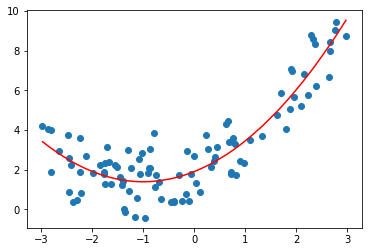

In [29]:
poly_reg2 = PolynomialRegression(degree=2)
poly_reg2.fit(X,y)
y_pred2 = poly_reg2.predict(X)
plt.scatter(x, y)
# plt.scatter(x, y_pred2, color = 'r')
plt.plot(np.sort(x), y_pred2[np.argsort(x)], color = 'r')
plt.show()

In [30]:
print(mean_squared_error(y,y_pred2))

1.0193565921864358


#### 过拟合

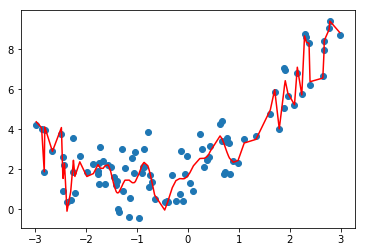

In [31]:
poly_reg3 = PolynomialRegression(degree=100)
poly_reg3.fit(X,y)
y_pred3 = poly_reg3.predict(X)
plt.scatter(x, y)
# plt.scatter(x, y_pred3, color = 'r')
plt.plot(np.sort(x), y_pred3[np.argsort(x)], color = 'r')
plt.show()

In [32]:
print(mean_squared_error(y,y_pred3))

0.5102988945958353


随着degree越大，均方误差肯定会越来越小，模型的效果肯定会更好。不过这样会使得模型的***泛化能力***变差，也就是对别的数据的预测效果会非常差。这也是我们用`train_test_split`划分数据集的原因。
![](http://images2015.cnblogs.com/blog/353956/201601/353956-20160104225042403-1499923033.jpg)

在欠拟合中，算法所表示的模型并不能完整的表达数据关系；  
而在过拟合中，算法所训练的模型过多的表达了数据间的关系，很有可能是过多的表达了数据间噪音的关系。

#### 学习曲线

学习曲线描述的就是随着样本数量的增多，算法训练出的模型的表现能力。

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)

In [35]:
train_score = []
test_score = []
for i in range(1,76):
    lin_reg = LinearRegression()
    lin_reg.fit(X_train[:i], y_train[:i])
    
    y_train_predict = lin_reg.predict(X_train[:i])
    train_score.append(mean_squared_error(y_train[:i], y_train_predict))
    
    y_test_predict = lin_reg.predict(X_test[:i])
    test_score.append(mean_squared_error(y_test[:i], y_test_predict))    

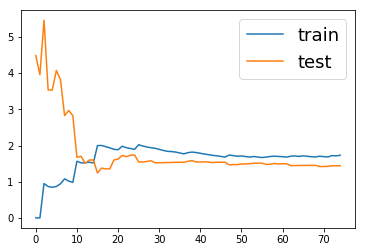

In [36]:
plt.plot(np.sqrt(train_score), label = 'train')
plt.plot(np.sqrt(test_score), label = 'test')
plt.legend(fontsize = 18)
plt.show()

为了方便对比，将上面的实现过程封装为一个函数：

In [37]:
def plot_learning_curve(algo, X_train, X_test, y_train, y_test):
    train_score = []
    test_score = []
    for i in range(1,len(X_train) + 1):
        algo.fit(X_train[:i], y_train[:i])

        y_train_predict = algo.predict(X_train[:i])
        train_score.append(mean_squared_error(y_train[:i], y_train_predict))

        y_test_predict = algo.predict(X_test[:i])
        test_score.append(mean_squared_error(y_test[:i], y_test_predict)) 
    
    plt.plot(np.sqrt(train_score), label = 'train')
    plt.plot(np.sqrt(test_score), label = 'test')
    plt.axis([0, len(X_train) + 1, 0, 4])
    plt.legend(fontsize = 18)
    plt.show()

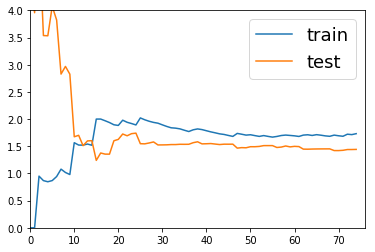

In [38]:
# 简单的线性回归
plot_learning_curve(LinearRegression(), X_train, X_test, y_train, y_test)

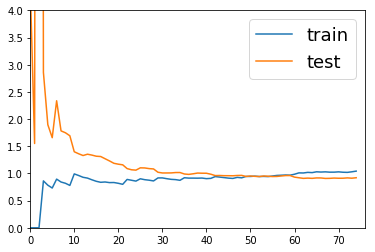

In [39]:
# 多项式回归 degree = 2
plot_learning_curve(PolynomialRegression(degree=2), X_train, X_test, y_train, y_test)

这两者趋势是基本一致的，不过稳定的误差有所差距。多项式回归稳定的分数比较小，可以说明用多项式回归效果更好。

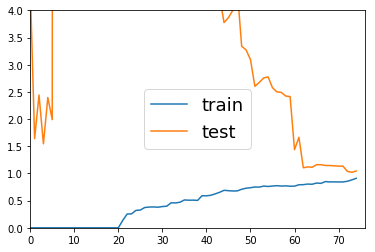

In [40]:
# 多项式回归 degree = 20
plot_learning_curve(PolynomialRegression(degree=20), X_train, X_test, y_train, y_test)

    在train data上表现的很好，但是在test数据上却有很大差距。这就说明存在明显的过拟合现象。

#### 交叉验证
以上充分说明了交叉验证的重要性。使用交叉验证可以得到模型的最佳参数。
![](https://www.researchgate.net/publication/326465007/figure/fig1/AS:649909518757888@1531961912055/Ten-fold-cross-validation-diagram-The-dataset-was-divided-into-ten-parts-and-nine-of.png)

In [44]:
from sklearn import datasets
digits = datasets.load_digits()
X = digits.data
y = digits.target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)

In [43]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

In [45]:
knn_clf = KNeighborsClassifier()
cross_val_score(knn_clf, X_train, y_train)

array([0.97037037, 0.97407407, 0.98884758, 0.98513011, 0.98884758])

In [54]:
best_k, best_p, best_score = 0, 0, 0
for k in range(2,11):
    for p in range(1,6):
        knn_clf = KNeighborsClassifier(weights='distance', n_neighbors=k, p=p)
        scores = cross_val_score(knn_clf, X_train, y_train)
        score = np.mean(scores)
        if score > best_score:
            best_score = score
            best_k = k
            best_p = p
print('best k = {}, \nbest p = {}, \nbest_score = {}'.format(best_k, best_p, best_score))

best k = 2, 
best p = 3, 
best_score = 0.9851576483546743


In [48]:
# CV 网格搜索
from sklearn.model_selection import GridSearchCV
param_grid = [
    {
        'weights':['distance'],
        'n_neighbors':[i for i in range(2,11)],
        'p':[i for i in range(1,6)]
    }
]

grid_search = GridSearchCV(knn_clf, param_grid, verbose = 1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 45 candidates, totalling 225 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 225 out of 225 | elapsed:   46.9s finished


GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid=[{'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10],
                          'p': [1, 2, 3, 4, 5], 'weights': ['distance']}],
             verbose=1)

In [55]:
print(grid_search.best_estimator_)
print(grid_search.best_params_)
print(grid_search.best_score_)

# GridSearchCV与自己写的结果是一致的

KNeighborsClassifier(n_neighbors=2, p=3, weights='distance')
{'n_neighbors': 2, 'p': 3, 'weights': 'distance'}
0.9851576483546743


还有一种留一法（Leave-one-out cross validation, LOO-CV），即令上述k=m（训练数据总数）。这样完全不受随机的影响，是最接近模型的真正指标的，但是缺点是运算量巨大。

### 偏差方差平衡

偏差(bias)与方差(variance)之间的区别如下图所示：
![](https://miro.medium.com/max/700/1*CgIdnlB6JK8orFKPXpc7Rg.png)

我们所说的模型误差，一般是指的如下三方面：  
模型误差 = 偏差 + 方差 + 不可避免的误差

导致偏差的可能原因：  
对问题本身的假设不正确：比如说对非线性数据使用线性回归。

导致高方差的可能原因：  
数据的一点点扰动都可能会较大的影响模型，通常是由于模型太复杂引起：比如高阶多项式回归。

有些算法是天生的高方差算法，比如说KNN。非参数学习一般都是高方差算法，因为不对数据进行任何假设。
有些算法是天生的高偏差算法，比如说线性回归。参数学习一般都是高偏差算法，因为对数据具有极强的假设。

通常两者是矛盾的，降低偏差就会提高方差，降低方差就会提高偏差。  
在机器学习中的主要挑战，主要来自于方差。  

解决高方差的几种方法：
1. 降低模型复杂度；
2. 降噪；
3. 增加样本数；
4. 使用验证集；
5. 模型正则化。

### 模型泛化与岭回归

模型正则化(Regularization)，比如原来多项式回归的目的是使得：  
$J(\theta)=MSE(y,\hat y;\theta)$最小；  
现在我们要加入一个正则化项，使其尽可能的小：  
$J(\theta)=MSE(y,\hat y;\theta) + \alpha \frac{1}{2}\sum^n_{i=1}\theta_i^2$   
其中$\theta$是该模型各项的系数。

上式加入了正则化项，这样实现的回归其实就是岭回归(Ridge Regression)。

In [98]:
np.random.seed(42)
x = np.random.uniform(-3.0, 3.0, size=100)
X = x.reshape(-1,1)
y = 0.5 * x + 3 * np.random.normal(0, 1, size=100)

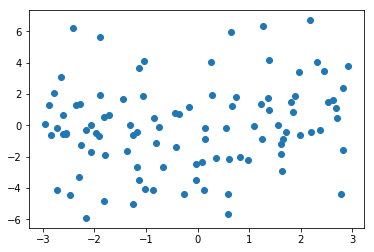

In [99]:
plt.scatter(x, y)
plt.show()

In [100]:
def PolynomialRegression(degree):
    poly_reg = Pipeline([
        ("poly", PolynomialFeatures(degree=degree)),
        ("std_scaler", StandardScaler()),
        ("lin_reg", LinearRegression())
    ])
    return poly_reg

In [101]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)

In [102]:
# 过拟合模型

poly_reg = PolynomialRegression(degree=20)
poly_reg.fit(X_train, y_train)
y_pred = poly_reg.predict(X_test)
mean_squared_error(y_test, y_pred)

977.4121623684274

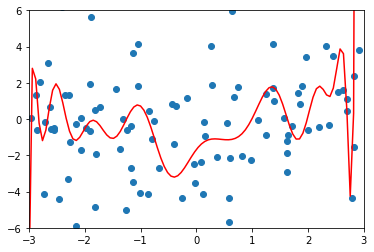

In [103]:
# 严重过拟合
X_plot = np.linspace(-3, 3, 100).reshape(-1,1)
y_plot = poly_reg.predict(X_plot)

plt.scatter(x,y)
plt.plot(X_plot[:,0], y_plot, color = 'r')
plt.axis([-3,3,-6,6])
plt.show()

In [104]:
# 将其封装为函数
def plot_model(model):
    
    X_plot = np.linspace(-3, 3, 100).reshape(-1,1)
    y_plot = model.predict(X_plot)

    plt.scatter(x,y)
    plt.plot(X_plot[:,0], y_plot, color = 'r')
    plt.axis([-3,3,-6,6])
    plt.show()

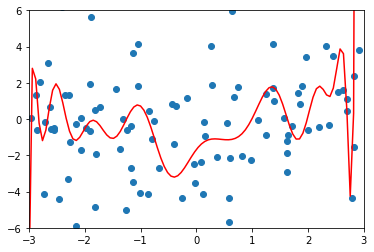

In [105]:
plot_model(model=poly_reg)

以下是用sklearn是用***岭回归***：

In [106]:
# 以下实现岭回归
from sklearn.linear_model import Ridge

def RidgeRegression(degree, alpha):
    return Pipeline([
        ("poly", PolynomialFeatures(degree=degree)),
        ("std_scaler", StandardScaler()),
        ("ridge_reg", Ridge(alpha = alpha))
    ])


In [107]:
# 可以看到效果变好了很多
ridge_reg1 = RidgeRegression(degree=20, alpha=0.001) 
ridge_reg1.fit(X_train, y_train)
y_pred1 = ridge_reg1.predict(X_test)
mean_squared_error(y_test, y_pred1)

8.852351935624096

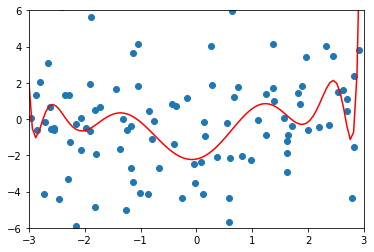

In [108]:
plot_model(ridge_reg1)

In [113]:
# 调整alpha为1
ridge_reg2 = RidgeRegression(degree=20, alpha=1) 
ridge_reg2.fit(X_train, y_train)
y_pred2 = ridge_reg2.predict(X_test)
mean_squared_error(y_test, y_pred2)

8.068289319874204

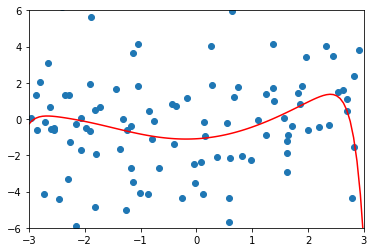

In [110]:
plot_model(ridge_reg2)

In [119]:
# 调整alpha为100
ridge_reg3 = RidgeRegression(degree=20, alpha=10000) 
ridge_reg3.fit(X_train, y_train)
y_pred3 = ridge_reg3.predict(X_test)
mean_squared_error(y_test, y_pred3)

7.579752110334465

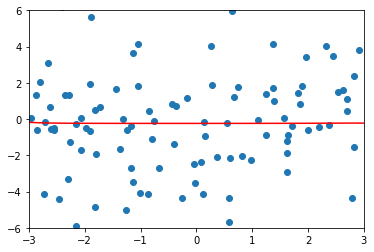

In [121]:
plot_model(ridge_reg3)

# 当alpha特别大的时候，其实就是theta接近于0的时候，几乎完全没有坡度

### Lasso正则化
上面岭回归加入$\theta$的和平方是正则化的一种方法，还有另一种方法：  
$J(\theta)=MSE(y,\hat y;\theta) + \alpha\sum^n_{i=1}|\theta_i|$  
将原来的平方变成了绝对值，这就是Lasso正则化。

In [122]:
from sklearn.linear_model import Lasso

def LassoRegression(degree, alpha):
    return Pipeline([
        ("poly", PolynomialFeatures(degree=degree)),
        ("std_scaler", StandardScaler()),
        ("lasso_reg", Lasso(alpha=alpha))
    ])

In [131]:
lasso_reg1 = LassoRegression(20, 0.01)
lasso_reg1.fit(X_train, y_train)
y_pred1 = lasso_reg1.predict(X_test)
mean_squared_error(y_test, y_pred1)

7.866916314155515

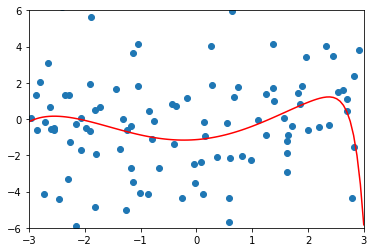

In [132]:
plot_model(lasso_reg1)

In [126]:
# 修改alpha
lasso_reg2 = LassoRegression(20, 0.1)
lasso_reg2.fit(X_train, y_train)
y_pred2 = lasso_reg2.predict(X_test)
mean_squared_error(y_test, y_pred2)

7.198569299371588

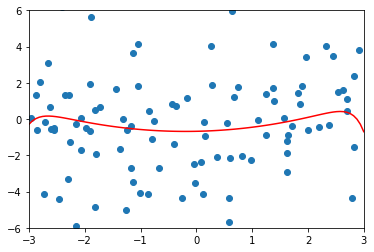

In [128]:
plot_model(lasso_reg2)

In [133]:
# 当alpha为1时，正则化已经很严格了

# 修改alpha
lasso_reg3 = LassoRegression(20, 1)
lasso_reg3.fit(X_train, y_train)
y_pred2 = lasso_reg3.predict(X_test)
mean_squared_error(y_test, y_pred3)

7.579752110334465

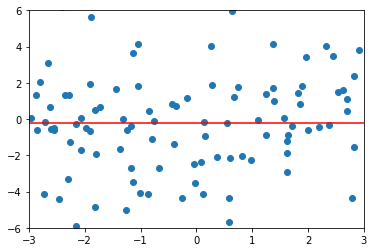

In [134]:
plot_model(lasso_reg3)

使用Lasso正则化，结果更倾向于直线；而Ridge更倾向于曲线。Lasso趋向于使得一部分$\theta$为0，所以Lasso可以做***特征选择***。

Lasso引入的其实就是L1正则项，Ridge就是L2正则项。  
此外还有一种L0正则，也就是引入一项，使得$\theta$的个数尽可能的小。但是这是一个离散最优化问题，可能需要穷举，这是一个NP难的问题。所以我们实际上是用L1正则来取代这种方法。

最后还有***弹性网络(Elastic Net)***，其实就是将L1与L2正则项结合起来。  
$J(\theta)=MSE(y,\hat y;\theta) + r\alpha\sum^n_{i=1}|\theta_i| + \frac{1-r}{2}\sum^n_{i=1}\theta_i^2 $  

